# PROJECT PART A :OUTLIER DETECTOR FOR BASKETBALL PLAYERS

This project aims find out who the outstanding players, outlier detection on the players.

# Import libraries

In [12]:
#!pip install streamlit
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn


# Reading the dataset

In [13]:
def load_data(file_name):
    return pd.read_csv(file_name)

def label_conversion(label_array):
    converted_array = np.ones(len(label_array))
    for i in range(len(label_array)):
        if(label_array[i] == 1):
            converted_array[i] = (-1)
    return converted_array

In [14]:


def adaboost_classifier(X_train, X_test, y_train, y_test):
    abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "AdaBoost Classifier")
    
def gradient_boosting_classifier(X_train, X_test, y_train, y_test):
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "Gradient Boosting Classifier")

def random_forest_classifier(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "Random Forest Classifier")

def knn_classifier(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "K-Nearest Neighbors Classifier")
    
def logistic_regression(X_train, X_test, y_train, y_test):
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "Logistic Regression Classifier")

def neural_network(X_train, X_test, y_train, y_test):
    nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    plotConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test,y_pred))
    plot_results(X_test, y_pred, "Neural Network")

def plotConfusionMatrix(test_labels, pred_labels):
    CM = confusion_matrix(test_labels, pred_labels)
    ax = plt.axes()
    sn.heatmap(CM, annot=True, fmt='d',
               annot_kws={"size": 10},
               xticklabels=['Class 0', 'Class 1'], # replace with your class names if different
               yticklabels=['Class 0', 'Class 1'], ax = ax) # replace with your class names if different
    ax.set_title('Confusion matrix')
    plt.show()

def plot_results(X_test, y_pred, title):
    for i in range (X_test.shape[0]):
        if(y_pred[i] == 1):
            plt.scatter(X_test[i,1], X_test[i,12], color = 'red', marker="x")
            plt.xlabel('Minutes')   
            plt.ylabel('EFF_Rating')
        else:
            plt.scatter(X_test[i,1], X_test[i,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF_Ratings') 
    plt.title(title)
    plt.show()


In [15]:

def display_outliers(dataset):
    outliers = dataset[dataset.iloc[:, 20] == 1]
    print("Outliers: ")
    print(outliers.head())
    for _, row in outliers.iterrows():
        print(f"{row[0]} - {row[1]} - {row[2]}")

def load_and_prepare_data(file_name):
    dataframe = load_data(file_name)
    dataframe.drop(['oreb', 'dreb'], axis=1, inplace=True)
    dataframe = dataframe.query('minutes > 500 and gp > 100')
    print("Data Loaded and Prepared: ")
    print(dataframe.head())
    return dataframe

def calculate_starting_year(career_data, data):
    starting_year = []
    for _, row in career_data.iterrows():
        identity, league = row[0], row[3]
        rows = data.query(f'ilkid == "{identity}" and leag == "{league}"')
        starting_year.append(rows.iloc[0, 1])
    return np.array(starting_year)

def calculate_eff_rating(career_data):
    EFF_Rating = []
    for _, row in career_data.iterrows():
        rating = (sum(row[6:11]) - (row[11] + (row[13] - row[14]) + (row[15] - row[16]))) / row[4]
        EFF_Rating.append(rating)
    return np.array(EFF_Rating)

def create_labels(EFF_Rating):
    y_label = np.where(EFF_Rating > 20.19, 1, 0)
    return y_label

def prepare_training_dataset(career_data):
    training_dataset = career_data.drop(['ilkid','firstname','leag','lastname','pf','tpa','tpm','year'], axis = 1).values  
    return training_dataset


In [16]:
dataframe = load_data('/Users/macbook/Downloads/databasebasketball/player_regular_season_career.csv')
career_data = load_and_prepare_data('/Users/macbook/Downloads/databasebasketball/player_regular_season_career.csv')
data = load_data('/Users/macbook/Downloads/databasebasketball/player_regular_season.csv')

starting_year = calculate_starting_year(career_data, data)
career_data.insert(19, "year", starting_year)
career_data.reset_index(drop=True, inplace=True)

EFF_Rating = calculate_eff_rating(career_data)
career_data.insert(20, "EFF", EFF_Rating)
y_label = create_labels(EFF_Rating)
training_dataset = prepare_training_dataset(career_data)

X_train, X_test, y_train, y_test = train_test_split(training_dataset, y_label, test_size = 0.30, random_state=5)


Data Loaded and Prepared: 
       ilkid firstname      lastname leag    gp  minutes    pts    reb  asts  \
0  ABDELAL01      Alaa     Abdelnaby    N   256     3200   1465    846    85   
1  ABDULKA01    Kareem  Abdul-jabbar    N  1560    57446  38387  17440  5660   
2  ABDULMA01     Mahmo    Abdul-rauf    N   586    15633   8553   1087  2079   
3  ABDULTA01     Tariq   Abdul-wahad    N   236     4808   1830    776   266   
4  ABDURSH01   Shareef   Abdur-rahim    N   672    24862  13338   5474  1847   

    stl   blk  turnover    pf    fga    fgm   fta   ftm   tpa  tpm  
0    71    69       247   484   1236    620   321   225     3    0  
1  1160  3189      2527  4657  28307  15837  9304  6712    18    1  
2   487    46       963  1107   7943   3514  1161  1051  1339  474  
3   184    82       309   485   1726    720   529   372    76   18  
4   718   556      1911  1845  10215   4789  4427  3614   477  146  


KNN


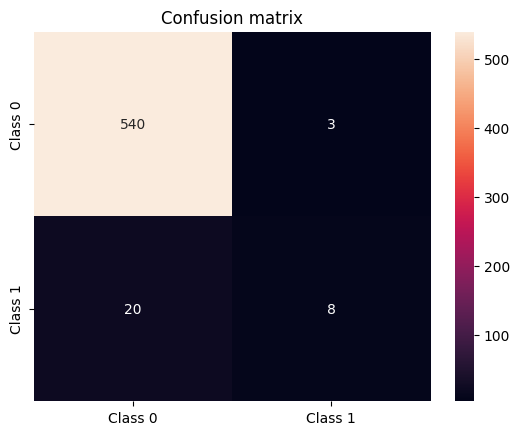

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       543
           1       0.73      0.29      0.41        28

    accuracy                           0.96       571
   macro avg       0.85      0.64      0.69       571
weighted avg       0.95      0.96      0.95       571



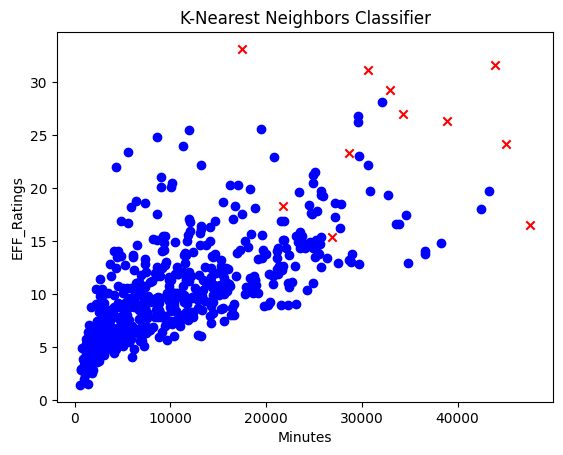

In [17]:
# Cell for KNN
print("KNN")
knn_classifier(X_train, X_test, y_train ,y_test)

Adaboost


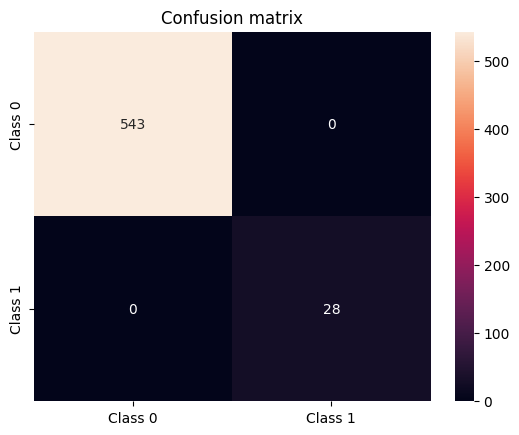

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00        28

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



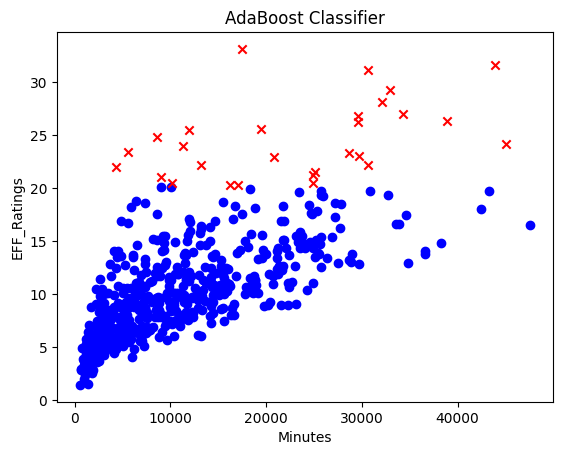

In [18]:
# Cell for Adaboost
print("Adaboost")
adaboost_classifier(X_train, X_test, y_train ,y_test)

Gradient Boosting


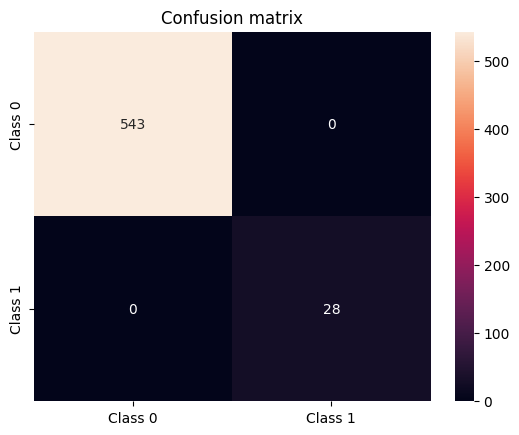

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00        28

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



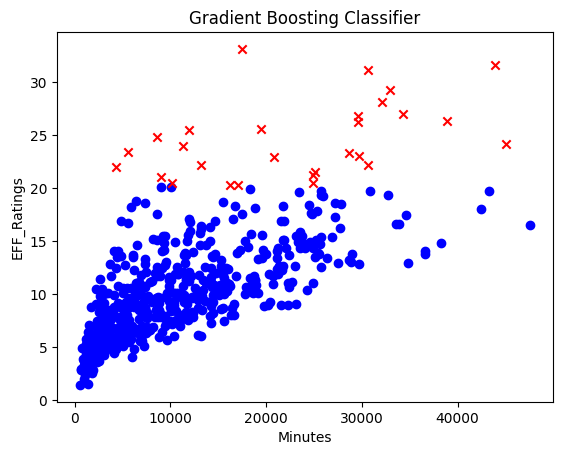

In [19]:
# Cell for Gradient Boosting
print("Gradient Boosting")
gradient_boosting_classifier(X_train, X_test, y_train ,y_test)


Random Forest


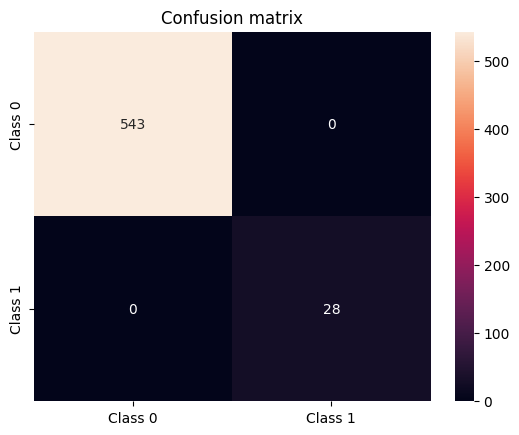

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00        28

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



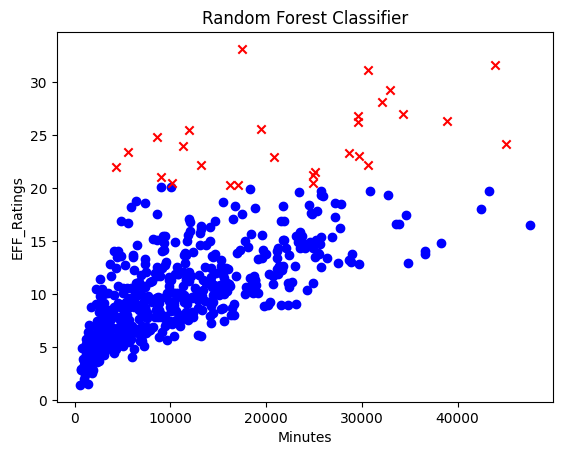

In [20]:
# Cell for Random Forest
print("Random Forest")
random_forest_classifier(X_train, X_test, y_train ,y_test)


Neural Network


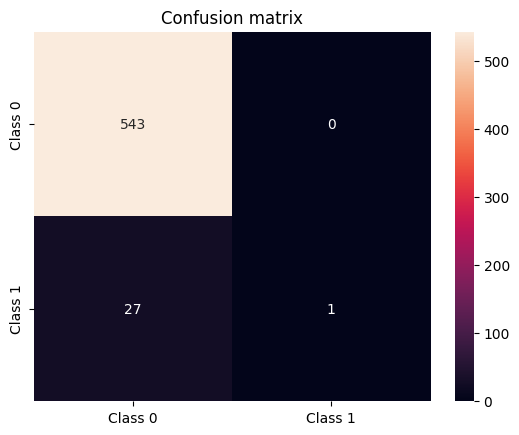

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       543
           1       1.00      0.04      0.07        28

    accuracy                           0.95       571
   macro avg       0.98      0.52      0.52       571
weighted avg       0.95      0.95      0.93       571



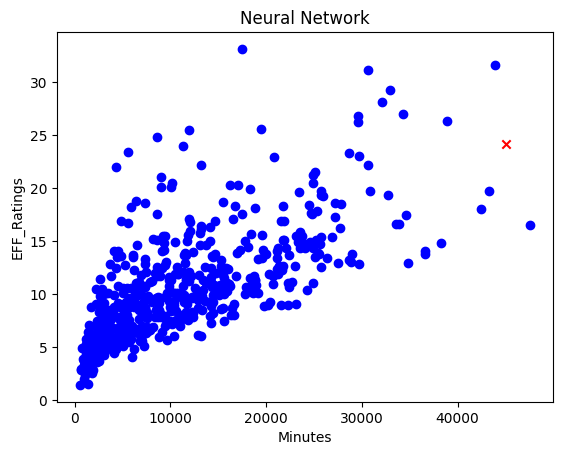

In [21]:
# Cell for Neural Network
print("Neural Network")
neural_network(X_train, X_test, y_train ,y_test)


logistic_regression


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


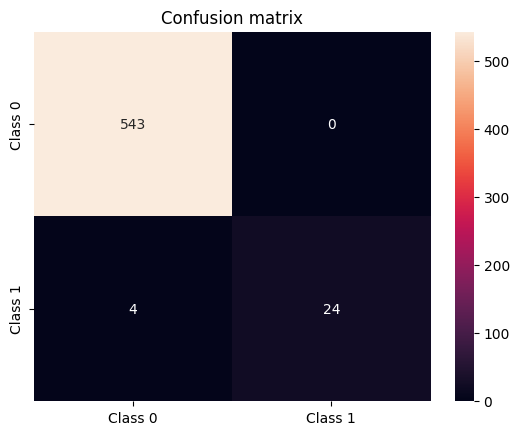

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       543
           1       1.00      0.86      0.92        28

    accuracy                           0.99       571
   macro avg       1.00      0.93      0.96       571
weighted avg       0.99      0.99      0.99       571



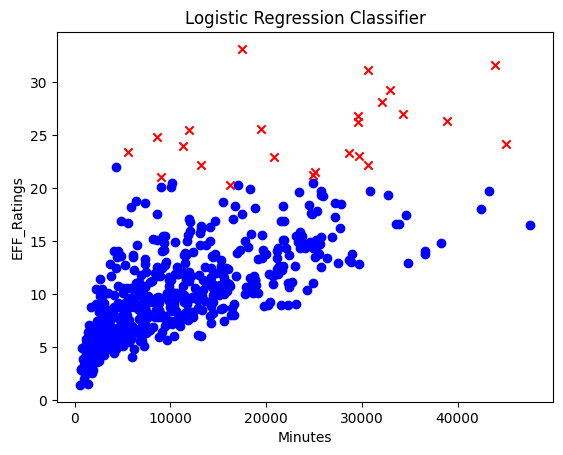

In [22]:
# Cell for Logistic Regression
print("logistic_regression")
logistic_regression(X_train, X_test, y_train ,y_test)
